# 最近邻搜索 (nearest neighbor search)

## <span id = "目录">目录</span>

+ 最近邻搜索基础
    1. [最近邻搜索简介和算法](#一)
    2. [数据表示和距离衡量标准的重要性](#二)
+ 快速最近邻搜索
    4. [KD-树：中低维和近似最近邻](#KD-tree)
    5. [LSH：高维上的近似最近邻](#LSH)
+ 在Wikipedia上的数值实验
    3. [Programming Assignment1：不同的数据表示和距离标准](#Assignment1)
    6. [Programming Assignment2：LSH](#Assignment2)
    
[Wikipedia数据集下载](https://d3c33hcgiwev3.cloudfront.net/_a20552cf806c54b71b3b87cb593b9968_people_wiki.gl.zip?Expires=1496880000&Signature=QbSJt5FSoiEPnXqxuiSEAa5d72h7w9duazuTVDcNp~IBlIIn37iJjFiZltvqtpQvC7zTRQ8kOhTRTSOQk4YbG67Xod-Ckpg6Mu902-b-Oo24GvMmcHPTg2IkmSjMgnQtzPx9c3IgUibt4tYlXs4HyF9MwEKM5xMe3xqPBmmVIVA_&Key-Pair-Id=APKAJLTNE6QMUY6HBC5A "Wikipedia数据集下载")

## <span id = "一">一、最近邻搜索简介和算法</span>

### 1. 问题背景

我们通过解决检索兴趣相关文章的问题来讨论最近邻搜索。首先我们来描述一下文献检索这个问题，假设你正在阅读一篇文章，比如一篇关于体育报道的新闻。   

** 目标：** 找到和当前阅读的文章最相似的文章  
** 两个问题：**

- 怎样定义相似性 (similarity)
- 怎么从一大堆文献中搜索相似文章

### 2. 最近邻搜索 (NN Search)

** 1-最近邻搜索 (1-NN search) **

假设我们已经对所有要被检索的文章定义了一个空间，空间中每篇文章的距离用相似性来描述。然后我们要找到空间中和当前阅读文章(query article)最相似的文章(1-NN)，或者最相似的文章集合。

![文章距离空间](image/article_space.JPG "文章距离空间")

***
** 1-最近邻算法 (1-NN algorithm) **
***
** 输入：** 当前阅读的文章：$X_q$
            文集：$X_1,X_2,\cdots,X_N$   
** 输出：** 最相似的文章：$X^{NN}$  
其中，$X^{NN}$ = arg$\min\limits_{i}$ distance$(X_i,X_q)$  
初始化 ** Dist2NN = $\infty, X^{NN}$ = $\varnothing$ **  
For $i=1,2,\cdots,N$  
　　计算：$\delta = distance(X_i,X_q)$  
    if $\delta<$**Dist2NN**  
    　　令 $X^{NN}=X_i$  
          　　令** Dist2NN**=$\delta$  
Return 最相似文章：$X^{NN}$
***

***
** K-最近邻算法 (K-NN algorithm) **
***  
** 输入：** 当前阅读的文章：$X_q$
             文集：$X_1,X_2,\cdots,X_N$   
** 输出：** 最相似的文章列表(list)：$X^{NN}$  
其中，$X^{NN}$ = $\{X^{NN_1},\cdots,X^{NN_k}\}$，对所有不在$X^{NN}$中的$X_i$，都有$distance(X_i,X_q)\ge\max\limits_{X^{NN_j},j=1,\cdots,k}distance(X^{NN_j},X_q)$  
初始化 ** Dist2KNN ** = sort$(\delta_1,\cdots,\delta_k)$，$X^{NN}=sort(X_1,\cdots,X_k)$     
For $i=k+1,\cdots,N$  
　　计算：$\delta = distance(X_i,X_q)$  
    if $\delta<$**Dist2KNN**[K]  
    　　找到**j**使得**Dist2KNN**[j]>$\delta>$**Dist2KNN**[j-1]  
    　　删除最远的元素并且移动列表：  
        　　　　$X^{NN}[j+1:K]=X^{NN}[j:K-1]$  
            　　**Dist2KNN**[j+1:K]=Dist2KNN[j:K-1]  
        　　   令 **Dist2KNN**[j]=$\delta$，$X^{NN}$[j]=$X_i$    
Return K篇最相似的文章：$X^{NN}$  
***

从上述算法中可以发现，实现**NN Search**的过程比较直观，但是有**两个很关键的因素：**  

- 怎样表示每篇文章，以便计算
- 怎么衡量文章之间的距离

## <span id = "二">二、数据表示和距离衡量标准的重要性</span>

### 1. 文章表示

** 简单词数统计(word counts)表示： **

- 忽略词的语序
- 统计每个词出现的次数  

**例：**"Carlos calls the sport futbol. Emily calls the sport soccer."    
$X_q=$ {'Carlos':1, 'the':2, 'Emily':1, 'soccer':1, 'calls':2, 'sport':2, 'futbol':1}

但是这种简单地统计文章中词汇出现的次数的表示方法，有一个缺陷。我们将文章中出现的词主要分为两类： 
+ 常用词：比如，'the', 'player', 'field'这些在所有要搜索文章中都经常出现。
+ 重要稀有词：比如，'futbol', 'Messi'，这些词并不是在所有文章中都频繁出现，但是同时在当前阅读的这篇文章中多次出现。  

显然，常用词对判断两篇文章的相似性没有什么意义，而它们往往又大量出现，所以改进的表示方法中应该增加重要稀有词的权重。  

** TF-IDF 文章表示 (Term Frequency Inverse Document Frequency)：**
强调重要稀有词：
+ 在当前文章中经常出现：
Term Frequency(tf) = 词数
+ 在整个文集中出现较少：
Inverse doc freq.(idf) = $log\frac{文章数}{1+用了这个词的文章数}$   
这一步即为降低常用词的比重，增加重要词汇的权重  

TF-IDF = tf * idf

### 2.欧几里得距离 (Euclidean)和带权的欧几里得（Scaled-Euclidean) 

当数据有多个特征时，或者说表示数据的向量是多维的，我们可能会决定每个特征的重要性，即设定不同的权重。
+ 比如这里，比较两篇文章的相似度时，假设文章的标题和摘要比文章的主体部分更能反映文章内容。
+ 也有可能，特征A变化大，特征B变化小，而实际上两个特征的变化同样重要，就需要对B赋予更大的权重。  
  在这种情况下，一种做法是将权重表示成特征散度的函数，比如，
  第j个特征的权重 = $\frac{1}{\max\limits_{i}(X_i[j])-\min\limits_{i}(X_i[j])}$
  
** Scaled-Euclidean: ** $distance(X_i,X_q)=\sqrt{a_1(X_i[1]-X_q[1])^2+\cdots+a_d(X_i[d]-X_q[d])^2}$，其中，$a_j,j=1,\cdots,d$即为特征的权重。  
特别地，$a_j$取0或1时，就是特征选择的效果。

如何设置权重，或者特征选择/[特征工程](https://www.zhihu.com/question/29316149 "特征工程-知乎")（Feature Selection/Feature Engineering)非常重要但同时也很困难，对不同的问题要具体分析。  

### 3. Cosine Similarity

除了欧几里得距离外，还有一种计算简便的内积距离测量方式：$distance(X_q,X_i)=X_i^{T} X_q$。此时，计算的是两篇文章重叠的词汇。  

**例：** $X_q=[1,0,0,0,5,3,0,0,1,0,0,0,0]$，$X_i=[3,0,0,0,2,0,0,1,0,1,0,0,0]$，相似性=13。

但是，从上面的例子可以看出，如果这两篇文章内容不变地复制成两倍长度的文章，相似性=52，也就是相似性增加，这明显是不合理的。所以考虑标准化的处理方式。

**cosine similarity =** $(\frac{X_i}{||X_i||})^T(\frac{X_q}{||X_q||})=\cos(\theta)$  
不过，cosine similarity并不是一种标准距离，不满足三角不等式，但是在计算稀疏向量（有很多个0）是非常快。
![cosine_similarity](image/cosine_similarity.JPG "cosine_similarity")

### 4. 是否标准化及其他距离

不过**cosine similarity**也有问题，判断两篇文章是否相似时，不是总想和长度无关，也可能让实际不想似的文章变得相似。那么到底要不要标准化呢？实际上，一般会给文章长度设定范围，最短最长是多少。

其他，还有诸如Mahalanobis, rank-based, correlation-based, Manhattan, Jaccard, Hamming等等各种距离度量方法，有兴趣的可以自行查看。  
当然，也可以组合使用这些度量方法，对特征的不同子集应用不同的测量，然后根据具体问题设置不同的权重。

## <span id = "Assignment1">Programming Assignment1</span>

[返回目录](#目录)

1. [准备：工具包、加载数据](#准备)
2. [初步实现最近邻搜索：word count](#word count)
3. [TF-IDF改进](#TF-IDF)
4. [不同距离度量的影响](#distance)

通过上述的各种讨论，当我们在大量文章集合中检索时，为了找到相似文章，通常要：

+ 决定相似性的衡量标准
+ 找到最相似的文章

接下来，我们在Wikipedia上实践算法找到和描述总统奥巴马的文章最相关的文章，直观感受一下：

+ 不同的相似性定义标准，怎样找到相似文章
+ 用简单词数统计和TF-IDF来表示文章的不同
+ 不同的距离度量方式，有怎样不同的效果

### <span id = "准备">相关工具包</span>

下面的代码在python和[graphlab create](https://turi.com/learn/ "安装graphlab")工具包的环境下运行。

首先，检查一下运行环境和工具包都能正常导入。

In [5]:
import graphlab
import matplotlib.pyplot as plt
import numpy as np
#show plot in jupyter notebook
%matplotlib inline 

'''Check GraphLab Create version'''
from distutils.version import StrictVersion
assert (StrictVersion(graphlab.version) >= StrictVersion('1.8.5')), 'GraphLab Create must be version 1.8.5 or later.'

### 加载Wikipedia数据集

在数据集中每个数据由文章的链接，文章描述的人物名字和文章内容（全都转换成小写）组成。

In [6]:
wiki = graphlab.SFrame('people_wiki.gl')

This non-commercial license of GraphLab Create for academic use is assigned to 2903199856@qq.com and will expire on May 31, 2018.


[INFO] graphlab.cython.cy_server: GraphLab Create v2.1 started. Logging: C:\Users\lenovo\AppData\Local\Temp\graphlab_server_1496551835.log.0


In [7]:
wiki

URI,name,text
<http://dbpedia.org/resource/Digby_Morrell> ...,Digby Morrell,digby morrell born 10october 1979 is a former ...
<http://dbpedia.org/resource/Alfred_J._Lewy> ...,Alfred J. Lewy,alfred j lewy aka sandylewy graduated from ...
<http://dbpedia.org/resource/Harpdog_Brown> ...,Harpdog Brown,harpdog brown is a singerand harmonica player who ...
<http://dbpedia.org/resource/Franz_Rottensteiner> ...,Franz Rottensteiner,franz rottensteiner bornin waidmannsfeld lower ...
<http://dbpedia.org/resource/G-Enka> ...,G-Enka,henry krvits born 30december 1974 in tallinn ...
<http://dbpedia.org/resource/Sam_Henderson> ...,Sam Henderson,sam henderson bornoctober 18 1969 is an ...
<http://dbpedia.org/resource/Aaron_LaCrate> ...,Aaron LaCrate,aaron lacrate is anamerican music producer ...
<http://dbpedia.org/resource/Trevor_Ferguson> ...,Trevor Ferguson,trevor ferguson aka johnfarrow born 11 november ...
<http://dbpedia.org/resource/Grant_Nelson> ...,Grant Nelson,grant nelson born 27april 1971 in london ...
<http://dbpedia.org/resource/Cathy_Caruth> ...,Cathy Caruth,cathy caruth born 1955 isfrank h t rhodes ...


### <span id = "word count">提取简单字数统计向量</span>

用graphlab进行简单计算统计，并作为wiki的一列添加。

In [8]:
wiki['word_count'] = graphlab.text_analytics.count_words(wiki['text'])

In [9]:
wiki

URI,name,text,word_count
<http://dbpedia.org/resource/Digby_Morrell> ...,Digby Morrell,digby morrell born 10october 1979 is a former ...,"{'since': 1L, 'carltons':1L, 'being': 1L, '2005': ..."
<http://dbpedia.org/resource/Alfred_J._Lewy> ...,Alfred J. Lewy,alfred j lewy aka sandylewy graduated from ...,"{'precise': 1L, 'thomas':1L, 'closely': 1L, ..."
<http://dbpedia.org/resource/Harpdog_Brown> ...,Harpdog Brown,harpdog brown is a singerand harmonica player who ...,"{'just': 1L, 'issued':1L, 'mainly': 1L, ..."
<http://dbpedia.org/resource/Franz_Rottensteiner> ...,Franz Rottensteiner,franz rottensteiner bornin waidmannsfeld lower ...,"{'all': 1L,'bauforschung': 1L, ..."
<http://dbpedia.org/resource/G-Enka> ...,G-Enka,henry krvits born 30december 1974 in tallinn ...,"{'legendary': 1L,'gangstergenka': 1L, ..."
<http://dbpedia.org/resource/Sam_Henderson> ...,Sam Henderson,sam henderson bornoctober 18 1969 is an ...,"{'now': 1L, 'currently':1L, 'less': 1L, 'being': ..."
<http://dbpedia.org/resource/Aaron_LaCrate> ...,Aaron LaCrate,aaron lacrate is anamerican music producer ...,"{'exclusive': 2L,'producer': 1L, 'tribe': ..."
<http://dbpedia.org/resource/Trevor_Ferguson> ...,Trevor Ferguson,trevor ferguson aka johnfarrow born 11 november ...,"{'taxi': 1L, 'salon': 1L,'gangs': 1L, 'being': ..."
<http://dbpedia.org/resource/Grant_Nelson> ...,Grant Nelson,grant nelson born 27april 1971 in london ...,"{'houston': 1L,'frankie': 1L, 'labels': ..."
<http://dbpedia.org/resource/Cathy_Caruth> ...,Cathy Caruth,cathy caruth born 1955 isfrank h t rhodes ...,"{'phenomenon': 1L,'deborash': 1L, ..."


### 找到相似文章

首先用简单字数统计向量代表文章，通过欧几里得距离计算相似性，来找奥巴马的类似文章。同样用graphlab来实现最近邻搜索算法。

In [10]:
# every data has features: word_count, using euclidean distance to compute similarity
# search method here is brute force.
model = graphlab.nearest_neighbors.create(wiki, label='name', features=['word_count'],
                                          method='brute_force', distance='euclidean')

Starting brute force nearest neighbors model training.

来看一下最相似的10篇文章：

In [11]:
model.query(wiki[wiki['name']=='Barack Obama'], label='name', k=10)

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.00169288  | 44.002ms     |

| Done         |         | 100         | 477.027ms    |

+--------------+---------+-------------+--------------+

query_label,reference_label,distance,rank
Barack Obama,Barack Obama,0.0,1
Barack Obama,Joe Biden,33.0756708171,2
Barack Obama,George W. Bush,34.3947670438,3
Barack Obama,Lawrence Summers,36.1524549651,4
Barack Obama,Mitt Romney,36.1662826401,5
Barack Obama,Francisco Barrio,36.3318042492,6
Barack Obama,Walter Mondale,36.4005494464,7
Barack Obama,Wynn Normington Hugh-Jones ...,36.4965751818,8
Barack Obama,Don Bonker,36.633318168,9
Barack Obama,Andy Anstett,36.9594372252,10


发现者十个人都是政治家，但是有一半的人除了是政治家以外和Obama就没有什么确切相似的关系了：

+ Francisco Barrio是一个墨西哥政客，是Chihuahua的前州长。
+ Walter Mondale和Don Bonker是1970末的民主党人士。
+ Wynn Normington Hugh-Jones是前英国外交官和自由党官员
+ Andy Anstett是加拿大前政员。

所以，通过简单字数统计来进行最近邻搜索，能返回一些正确信息，但是漏掉了其他一些更重要的细节。

比如，为什么很奇怪地认为Francisco Barrio比其他人和Obama更相关。首先，看一看描述他们二者的文章中出现的最频繁的一些词。

In [12]:
def top_words(name):
    """
    Get a table of the most frequent words in the given person's wikipedia page.
    """
    row = wiki[wiki['name'] == name]
    word_count_table = row[['word_count']].stack('word_count', new_column_name=['word','count'])
    return word_count_table.sort('count', ascending=False) 

In [13]:
obama_words = top_words('Barack Obama')
obama_words

word,count
the,40
in,30
and,21
of,18
to,14
his,11
obama,9
act,8
a,7
he,7


In [14]:
barrio_words = top_words('Francisco Barrio')
barrio_words

word,count
the,36
of,24
and,18
in,17
he,10
to,9
chihuahua,7
a,6
governor,6
his,5


再来看一下在两篇文章中都经常出现的词。这里用到了**join**操作，相当于两个表通过共有的列进行连接。更多详细类容参考[这篇文章](https://dato.com/products/create/docs/generated/graphlab.SFrame.join.html "SFrame.join")。

In [15]:
combined_words = obama_words.join(barrio_words, on='word')
combined_words

word,count,count.1
the,40,36
in,30,17
and,21,18
of,18,24
to,14,9
his,11,5
a,7,6
he,7,10
as,6,5
was,5,4


为了阅读方便，给combined_word表的两个count列重新命名：

In [16]:
combined_words = combined_words.rename({'count':'Obama', 'count.1':'Barrio'})
combined_words

word,Obama,Barrio
the,40,36
in,30,17
and,21,18
of,18,24
to,14,9
his,11,5
a,7,6
he,7,10
as,6,5
was,5,4


**注意：** **join**操作只是简单地连接相同的列，并没有强制排序，为了看的更清楚，对表进行**sort**操作。

In [17]:
combined_words.sort('Obama', ascending=False)

word,Obama,Barrio
the,40,36
in,30,17
and,21,18
of,18,24
to,14,9
his,11,5
a,7,6
he,7,10
as,6,5
was,5,4


**小问题： **在同时出现在Obama和Barrio文章的单词中，找到在Obama文章中最常出现的5个。那么在数据集，也就是所有文章中，包含了这5个词的有多少篇？

提示：

+ 从上面一块代码中找到两篇文章共有的词，排序找到频数最大的5个。
+ word_count列中每一个元素都是一个字典（dictionary）。对每一个word count值，检查是否有这5个词。定义has_top_words()函数来完成。
    + 将这5个词组成的列表转化成集合：set(common_word)。
    + 从文章的word_count字典中提取关键字列表：keys()。
    + 同样把这些关键字的列表转化成集合。
    + 用[issubset()](https://docs.python.org/2/library/stdtypes.html#set "issubset()")来检查那5个词是否包含在关键字中。
+ 对数据集的每一行，应用has_top_words。
+ 计算有这5个词的文章数目。

In [18]:
common_words = combined_words['word'][:5]  # the largest 5 common words

def has_top_words(word_count_vector):
    # extract the keys of word_count_vector and convert it to a set
    unique_words = word_count_vector.keys() # the words of an article
    # return True if common_words is a subset of unique_words
    # return False otherwise
    return set(common_words).issubset(set(unique_words))  # is that article has common words?

wiki['has_top_words'] = wiki['word_count'].apply(has_top_words)

# use has_top_words column to answer the quiz question
artNums = len(wiki[wiki['has_top_words'] == True])# the sum

In [19]:
artNums

56066

随机选两篇文章，来测试一下has_top_words函数。

In [20]:
print 'Output from your function:', has_top_words(wiki[32]['word_count'])
print 'Correct output: True'
print 'Also check the length of unique_words. It should be 167'

Output from your function: True
Correct output: True
Also check the length of unique_words. It should be 167


In [21]:
print 'Output from your function:', has_top_words(wiki[33]['word_count'])
print 'Correct output: False'
print 'Also check the length of unique_words. It should be 188'

Output from your function: False
Correct output: False
Also check the length of unique_words. It should be 188


**小问题：**计算介绍Barack Obama, George W. Bush, 和 Joe Biden的文章两两直间的距离，哪个最小？

提示：用graphlab.toolkits.distances.euclidean来计算距离，[参考](https://dato.com/products/create/docs/generated/graphlab.toolkits.distances.euclidean.html "计算距离")。

In [22]:
obama_word_count = wiki[wiki['name']=='Barack Obama']['word_count'][0]
bush_word_count = wiki[wiki['name']=='George W. Bush']['word_count'][0]
biden_word_count = wiki[wiki['name']=='Joe Biden']['word_count'][0]
obama2bush = graphlab.toolkits.distances.euclidean(obama_word_count ,bush_word_count)
obama2biden = graphlab.toolkits.distances.euclidean(obama_word_count ,biden_word_count)
bush2biden = graphlab.toolkits.distances.euclidean(bush_word_count ,biden_word_count)
print 'obama2bush: ', obama2bush
print 'obama2biden: ', obama2biden
print 'bush2biden: ', bush2biden

obama2bush:  34.3947670438
obama2biden:  33.0756708171
bush2biden:  32.7566787083


**小问题：**在介绍Barack Obama和 George W. Bush的文章都有的词汇里，找出在Obama的文章里最常见的10个词。

In [23]:
bush_words = top_words('George W. Bush')
combined_words = obama_words.join(bush_words, on='word') 
combined_words = combined_words.rename({'count':'Obama', 'count.1':'W.Bush'})
combined_words.sort('Obama', ascending=False)
combined_words['word'][:10]

dtype: str
Rows: 10
['the', 'in', 'and', 'of', 'to', 'he', 'his', 'a', 'president', 'as']

**注意：**即使通用词占了很大的比例，在特别的政治词汇中常出现的词，比如‘president'还是体现出来了。这也就是为什么在反馈和Obama相关的文章中列出的都是政治家而不是音乐家之类的。接下来，我们用TF-IDF来表示文章，将会更强调重要的稀有词的作用。

### <span id = "TF-IDF">用 **TF-IDF**来改进</span>

通过上面的展示，发现Obama和Barrio的相似性大多来源于通用词的重复，下面用TF-IDF来表示文章，以强调文章中的重要稀有词，同样搜索和Obama最相关的10篇文章。

In [24]:
wiki['tf_idf'] = graphlab.text_analytics.tf_idf(wiki['word_count'])

In [25]:
model_tf_idf = graphlab.nearest_neighbors.create(wiki, label='name', features=['tf_idf'],
                                                 method='brute_force', distance='euclidean')

Starting brute force nearest neighbors model training.

In [26]:
model_tf_idf.query(wiki[wiki['name'] == 'Barack Obama'], label='name', k=10)

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.00169288  | 3.86s        |

| Done         |         | 100         | 4.50s        |

+--------------+---------+-------------+--------------+

query_label,reference_label,distance,rank
Barack Obama,Barack Obama,0.0,1
Barack Obama,Phil Schiliro,106.861013691,2
Barack Obama,Jeff Sessions,108.871674216,3
Barack Obama,Jesse Lee (politician),109.045697909,4
Barack Obama,Samantha Power,109.108106165,5
Barack Obama,Bob Menendez,109.781867105,6
Barack Obama,Eric Stern (politician),109.95778808,7
Barack Obama,James A. Guest,110.413888718,8
Barack Obama,Roland Grossenbacher,110.4706087,9
Barack Obama,Tulsi Gabbard,110.696997999,10


让我们先判断一下这里列出的文章是否有意义。

+ 除了Roland Grossenbacher，其他的8位都是和Obama同时期的政客。
+ Phil Schiliro, Jesse Lee, Samantha Power, 和 Eric Stern都为Obama工作。

很明显，这个结果比之前用简单字数统计得到的要合理的多。可以详细看一下Obama和Schiliro的文章用词。

In [27]:
def top_words_tf_idf(name):
    row = wiki[wiki['name'] == name]
    word_count_table = row[['tf_idf']].stack('tf_idf', new_column_name=['word','weight'])
    return word_count_table.sort('weight', ascending=False)

In [28]:
obama_tf_idf = top_words_tf_idf('Barack Obama')
obama_tf_idf

word,weight
obama,43.2956530721
act,27.678222623
iraq,17.747378588
control,14.8870608452
law,14.7229357618
ordered,14.5333739509
military,13.1159327785
involvement,12.7843852412
response,12.7843852412
democratic,12.4106886973


In [29]:
schiliro_tf_idf = top_words_tf_idf('Phil Schiliro')
schiliro_tf_idf

word,weight
schiliro,21.9729907785
staff,15.8564416352
congressional,13.5470876563
daschleschiliro,10.9864953892
obama,9.62125623824
waxman,9.04058524017
president,9.03358661416
2014from,8.68391029623
law,7.36146788088
consultant,6.91310403725


同样，用**join**来比较两者的共同词汇，并且按Obama的TF-IDF值来排序。

In [30]:
combined_tf_idf = obama_tf_idf.join(schiliro_tf_idf, on='word') 
combined_tf_idf = combined_tf_idf.rename({'weight':'Obama', 'weight.1':'Schiliro'})
combined_tf_idf.sort('Obama', ascending=False) 

word,Obama,Schiliro
obama,43.2956530721,9.62125623824
law,14.7229357618,7.36146788088
democratic,12.4106886973,6.20534434867
senate,10.1642881797,3.3880960599
presidential,7.3869554189,3.69347770945
president,7.22686929133,9.03358661416
policy,6.09538628214,3.04769314107
states,5.47320098963,1.82440032988
office,5.24817282322,2.62408641161
2011,5.10704127031,3.40469418021


**小问题：**总共有多少篇文章含有上面那些词里最大的5个呢？

In [31]:
common_words = combined_tf_idf['word'][:5]  

def has_top_words(word_count_vector):
    # extract the keys of word_count_vector and convert it to a set
    unique_words = word_count_vector.keys()   
    # return True if common_words is a subset of unique_words
    # return False otherwise
    return set(common_words).issubset(set(unique_words))  

wiki['has_top_words'] = wiki['word_count'].apply(has_top_words)

# use has_top_words column to answer the quiz question
len(wiki[wiki['has_top_words']==True]) 

14

注意到，用TF-IDF来表示文章，计算距离时排除了通用词的噪声干扰，所以范围缩小了很多。

### <span id = "distance">选择距离度量方法</span>

观察返回的相关文章列表，发现Joe Biden，Obama的在两届总统选举中的竞选搭档，竟然不在tf-idf返回的结果中。我们来看一下这是为什么。首先，计算一下这二者的TF-IDF之间的距离。

In [32]:
obama_tf_count = wiki[wiki['name']=='Barack Obama']['tf_idf'][0]
biden_tf_count = wiki[wiki['name']=='Joe Biden']['tf_idf'][0]
obama2biden = graphlab.toolkits.distances.euclidean(obama_tf_count, biden_tf_count)
obama2biden

123.29745600964296

确实，这个距离比返回的列表中的距离要大，我们重新看一下这个列表。

In [33]:
model_tf_idf.query(wiki[wiki['name'] == 'Barack Obama'], label='name', k=10)

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.00169288  | 17.001ms     |

| Done         |         | 100         | 485.027ms    |

+--------------+---------+-------------+--------------+

query_label,reference_label,distance,rank
Barack Obama,Barack Obama,0.0,1
Barack Obama,Phil Schiliro,106.861013691,2
Barack Obama,Jeff Sessions,108.871674216,3
Barack Obama,Jesse Lee (politician),109.045697909,4
Barack Obama,Samantha Power,109.108106165,5
Barack Obama,Bob Menendez,109.781867105,6
Barack Obama,Eric Stern (politician),109.95778808,7
Barack Obama,James A. Guest,110.413888718,8
Barack Obama,Roland Grossenbacher,110.4706087,9
Barack Obama,Tulsi Gabbard,110.696997999,10


那么，是不是关于Biden的文章与Obama的之间的差别，比Schiliro和Obama的更大呢？更进一步分析，发现我们的搜索结果返回了更多短文。但是说短文比长文更相关，明显是没有道理的。先计算一下数据集中所有文章的长度和与Obama最相关的100篇文章的长度。

In [34]:
def compute_length(row):
    return len(row['text'].split(' '))

wiki['length'] = wiki.apply(compute_length) 

In [35]:
# find the nearest 100 articles
nearest_neighbors_euclidean = model_tf_idf.query(wiki[wiki['name'] == 'Barack Obama'], label='name', k=100)
# the length of these 100 articles
nearest_neighbors_euclidean = nearest_neighbors_euclidean.join(wiki[['name', 'length']], on={'reference_label':'name'})

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.00169288  | 18.001ms     |

| Done         |         | 100         | 593.034ms    |

+--------------+---------+-------------+--------------+

In [36]:
nearest_neighbors_euclidean.sort('rank')

query_label,reference_label,distance,rank,length
Barack Obama,Barack Obama,0.0,1,540
Barack Obama,Phil Schiliro,106.861013691,2,208
Barack Obama,Jeff Sessions,108.871674216,3,230
Barack Obama,Jesse Lee (politician),109.045697909,4,216
Barack Obama,Samantha Power,109.108106165,5,310
Barack Obama,Bob Menendez,109.781867105,6,220
Barack Obama,Eric Stern (politician),109.95778808,7,255
Barack Obama,James A. Guest,110.413888718,8,215
Barack Obama,Roland Grossenbacher,110.4706087,9,201
Barack Obama,Tulsi Gabbard,110.696997999,10,228


为了清楚地比较这些相似文章和其他文章的长度，画一个柱状图。

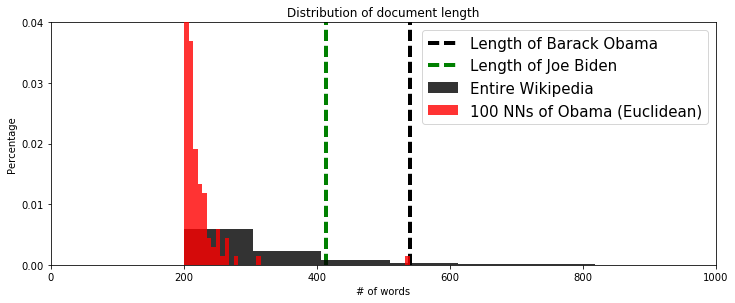

In [37]:
plt.figure(figsize=(10.5,4.5))
plt.hist(wiki['length'], 50, color='k', edgecolor='None', histtype='stepfilled', normed=True,
         label='Entire Wikipedia', zorder=3, alpha=0.8)
plt.hist(nearest_neighbors_euclidean['length'], 50, color='r', edgecolor='None', histtype='stepfilled', normed=True,
         label='100 NNs of Obama (Euclidean)', zorder=10, alpha=0.8)
plt.axvline(x=wiki['length'][wiki['name'] == 'Barack Obama'][0], color='k', linestyle='--', linewidth=4,
           label='Length of Barack Obama', zorder=2)
plt.axvline(x=wiki['length'][wiki['name'] == 'Joe Biden'][0], color='g', linestyle='--', linewidth=4,
           label='Length of Joe Biden', zorder=1)
plt.axis([0, 1000, 0, 0.04])

plt.legend(loc='best', prop={'size':15})
plt.title('Distribution of document length')
plt.xlabel('# of words')
plt.ylabel('Percentage')
plt.rcParams.update({'font.size':16})
plt.tight_layout()

和数据集中其他文章相比，Obama的相似文章大都相对地短很多，不超过300词。但是Wikipedia中的很多文章都超过了300个单词，而且，Obama和Biden的文章都超过了300，所以认为短文章更相关显然是没有道理的。

**注意：**出于计算时间的考虑，这里的文章其实都只是摘要而非全文，所以比真实的文章短得多。

为了消除这种对短文的偏向，考虑**cosine distances**：$$d(x,y) = 1-\frac{x^Ty}{||x||||y||}$$   
下面训练一个新的最近邻模型，用cosine distance来计算和Obama最相近的100篇文章。

In [38]:
model2_tf_idf = graphlab.nearest_neighbors.create(wiki, label='name', features=['tf_idf'],
                                                  method='brute_force', distance='cosine')

Starting brute force nearest neighbors model training.

In [39]:
nearest_neighbors_cosine = model2_tf_idf.query(wiki[wiki['name'] == 'Barack Obama'], label='name', k=100)
nearest_neighbors_cosine = nearest_neighbors_cosine.join(wiki[['name', 'length']], on={'reference_label':'name'})

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.00169288  | 690.039ms    |

| Done         |         | 100         | 1.08s        |

+--------------+---------+-------------+--------------+

In [40]:
nearest_neighbors_cosine.sort('rank')

query_label,reference_label,distance,rank,length
Barack Obama,Barack Obama,0.0,1,540
Barack Obama,Joe Biden,0.703138676734,2,414
Barack Obama,Samantha Power,0.742981902328,3,310
Barack Obama,Hillary Rodham Clinton,0.758358397887,4,580
Barack Obama,Eric Stern (politician),0.770561227601,5,255
Barack Obama,Robert Gibbs,0.784677504751,6,257
Barack Obama,Eric Holder,0.788039072943,7,232
Barack Obama,Jesse Lee (politician),0.790926415366,8,216
Barack Obama,Henry Waxman,0.798322602893,9,279
Barack Obama,Joe the Plumber,0.799466360042,10,217


看一看上面的这个结果，Joe Biden是最相关的，同时Hillary也上榜了，看起来相当不错。

画个图看一下：

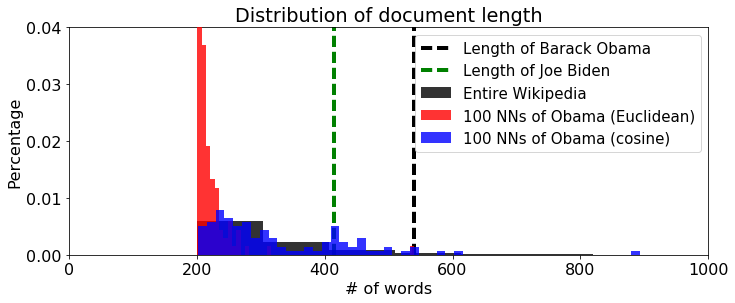

In [41]:
plt.figure(figsize=(10.5,4.5))
plt.figure(figsize=(10.5,4.5))
plt.hist(wiki['length'], 50, color='k', edgecolor='None', histtype='stepfilled', normed=True,
         label='Entire Wikipedia', zorder=3, alpha=0.8)
plt.hist(nearest_neighbors_euclidean['length'], 50, color='r', edgecolor='None', histtype='stepfilled', normed=True,
         label='100 NNs of Obama (Euclidean)', zorder=10, alpha=0.8)
plt.hist(nearest_neighbors_cosine['length'], 50, color='b', edgecolor='None', histtype='stepfilled', normed=True,
         label='100 NNs of Obama (cosine)', zorder=11, alpha=0.8)
plt.axvline(x=wiki['length'][wiki['name'] == 'Barack Obama'][0], color='k', linestyle='--', linewidth=4,
           label='Length of Barack Obama', zorder=2)
plt.axvline(x=wiki['length'][wiki['name'] == 'Joe Biden'][0], color='g', linestyle='--', linewidth=4,
           label='Length of Joe Biden', zorder=1)
plt.axis([0, 1000, 0, 0.04])
plt.legend(loc='best', prop={'size':15})
plt.title('Distribution of document length')
plt.xlabel('# of words')
plt.ylabel('Percentage')
plt.rcParams.update({'font.size': 16})
plt.tight_layout()

确实，cosine distance反馈的100篇文章基本上是在整个数据集各种长度的文章上的一个采样，而不是像欧几里得距离那样集中在短文章中。

**启示：**在决定特征和距离度量方法时，检查你得到的结果是否满足了你的要求，是否合理。

### cosine distance的问题：tweets V.S. 长文章

还没有完，前面提到cosine distance忽略了所有的文章长度，而这并不是在所有问题中都适用的，比如下面这个特地构造出来的一条tweet。

```
+--------------------------------------------------------+
|                                             +--------+ |
|  One that shall not be named                | Follow | |
|  @username                                  +--------+ |
|                                                        |
|  Democratic governments control law in response to     |
|  popular act.                                          |
|                                                        |
|  8:05 AM - 16 May 2016                                 |
|                                                        |
|  Reply   Retweet (1,332)   Like (300)                  |
|                                                        |
+--------------------------------------------------------+
```

这条tweet和介绍Obama的Wikipedia文章有多相似呢？先把tweet转化成数据集中数据的形式，计算tf-idf。

In [42]:
sf = graphlab.SFrame({'text': ['democratic governments control law in response to popular act']})
sf['word_count'] = graphlab.text_analytics.count_words(sf['text'])

encoder = graphlab.feature_engineering.TFIDF(features=['word_count'], output_column_prefix='tf_idf')
encoder.fit(wiki)
sf = encoder.transform(sf)
sf

text,word_count,tf_idf.word_count
democratic governmentscontrol law in response ...,"{'control': 1L,'democratic': 1L, 'act': ...","{'control':3.721765211295327, ..."


下面是Obama和tweet的TF-IDF向量：

In [43]:
tweet_tf_idf = sf[0]['tf_idf.word_count']
tweet_tf_idf

{'act': 3.4597778278724887,
 'control': 3.721765211295327,
 'democratic': 3.1026721743330414,
 'governments': 4.167571323949673,
 'in': 0.0009654063501214492,
 'law': 2.4538226269605703,
 'popular': 2.764478952022998,
 'response': 4.261461747058352,
 'to': 0.04694493768179923}

In [44]:
obama = wiki[wiki['name'] == 'Barack Obama']
obama

Columns:
	URI	str
	name	str
	text	str
	word_count	dict
	has_top_words	int
	tf_idf	dict
	length	int

Rows: Unknown

Data:
+-------------------------------+--------------+-------------------------------+
|              URI              |     name     |              text             |
+-------------------------------+--------------+-------------------------------+
| <http://dbpedia.org/resour... | Barack Obama | barack hussein obama ii br... |
+-------------------------------+--------------+-------------------------------+
+-------------------------------+---------------+-------------------------------+
|           word_count          | has_top_words |             tf_idf            |
+-------------------------------+---------------+-------------------------------+
| {'operations': 1L, 'repres... |       1       | {'operations': 3.811771079... |
+-------------------------------+---------------+-------------------------------+
+--------+
| length |
+--------+
|  540   |
+--------+
[? rows x 7 columns]
Note: Only the head of the SFrame is printed. This SFrame is lazily evaluated.
You can use sf.materialize() to force materialization.

计算二者之间的cosine distance：

In [45]:
obama_tf_idf = obama[0]['tf_idf']
graphlab.toolkits.distances.cosine(obama_tf_idf, tweet_tf_idf)

0.7059183777794327

和那些与Obama最相关的10篇文章的距离相比较：

In [46]:
model2_tf_idf.query(obama, label='name', k=10)

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.00169288  | 1.08s        |

| 0            | 46349   | 78.4632     | 1.48s        |

| 0            | 55570   | 94.0732     | 2.67s        |

| Done         |         | 100         | 3.08s        |

+--------------+---------+-------------+--------------+

query_label,reference_label,distance,rank
Barack Obama,Barack Obama,0.0,1
Barack Obama,Joe Biden,0.703138676734,2
Barack Obama,Samantha Power,0.742981902328,3
Barack Obama,Hillary Rodham Clinton,0.758358397887,4
Barack Obama,Eric Stern (politician),0.770561227601,5
Barack Obama,Robert Gibbs,0.784677504751,6
Barack Obama,Eric Holder,0.788039072943,7
Barack Obama,Jesse Lee (politician),0.790926415366,8
Barack Obama,Henry Waxman,0.798322602893,9
Barack Obama,Joe the Plumber,0.799466360042,10


发现这条tweet和Obama的距离，除了比不过Joe Biden外，都要小。但是这不能说明tweet就和Obama更相关。在这个例子中，完全忽略长度是不合理的。所以实际上，要有最大和最小文章长度。

## <span id = "KD-tree">三、用KD-树(KD-trees)扩大K-NN搜索规模</span>

### brute force搜索的时间复杂度

**brute force**搜索，即直接枚举搜索，一个一个按顺序比较，所以时间复杂度是：

+ 1-NN：O(N)
+ K-NN: O(NlogK)，这里维持K篇当前搜索出的文章距离的顺序需要O(logK)的时间。 

所以，当文章集合非常大，而且对固定的文集进行多次检索时，检索时间很长。

### KD-trees

将数据集表示成一种新的数据结构--**KD-trees**，用这种数据结构来组织文章更高效。首先假设2维的情况，只有两个词，构造KD-trees：

1. 对空间进行轴向切割，以划分空间成不同的盒子(区域)(bins)；
    + 对哪一维分割(这里是X,Y轴)：split dimention
    + 按多少来分割：split value
2. 按照分割，决定数据集中的每一个点落在哪个盒子里；
3. 对每一个盒子或者说数据子集，又进行分割，重复1.2.过程。
    + 直到停止，比如每个盒子里只有少量的点

这样，形成一个二叉树，二叉树的每一个叶子节点里是在同一个盒子里的数据集合，每一个中间节点中则储存分割维度(split dimension)、分割值(split value)和包括当前盒子的所有点的最小范围(bounding box)。

![KD-tree构造](image/KD-constructure.JPG "构造KD-树")

KD-树的构造还是很直观的，关键在于：

+ 每一次怎么选取划分维度：
    选范围最大的维度，交替选择维度...
+ 每一次的划分值怎么确定
    选划分维度的中点，选数据中心...
+ 什么时候停止划分
    每个最小盒子中包含的数据点小于给定值m，盒子的大小小于给定值...
    
这些都没有固定的标准，一般都是实际应用中，探索地设置调整。

![不同的划分值](image/heuristic.jpg "划分方式")

### 在KD-树上进行1-最近邻搜索

构造好KD-tree之后，我们遍历二叉树来搜索。对一篇给定的当前阅读文章(query point)：

1. 沿着二叉树向下查找query point所在的叶子节点。
2. 计算在这个叶子节点中所有点到query point的距离，找到目前为止最近的点。
    
    记此时的最近距离为r，但是并不就是最近点了。  
    
3. 回溯，搜索其他分支，更新当前最近距离。
   
   根据节点中记录的bounding box，如果query point的点到bounding box的距离比r大，那么整个节点分支都可以被删除。
   
从第三步，可以看出如果划分合适的话，利用bounding box可以大大减少要搜索的点，从而提高效率。

对应的K-最近邻搜索，几乎是一样的，只是此时要记录最近的K个点和距离。

### KD-tree来搜索的时间复杂度

KD-tree的搜索效率和分割空间有很大的关系，假设最终得到的是一棵基本平衡的二叉树，我们看两种极端的情况：

![极端时间复杂度](image/complexity.JPG "极端情况")

所以，如果数据集中共有N个点，找到1-NN的时间在O(logN)和O(N)之间。而构造KD-树的时间复杂度为O(NlogN)(这里对树的每一层用到了优先队列)。如果只进行一次搜索，可能不必要花时间构造树，但是如果对同一个数据集进行多次，比如N次，每篇文章都来找最近邻，那么和brute force搜索相比，效率大大提高。

### 在大规模数据集上，KD-树的性能

**KD-树**在中低维数据上，搜索效率高。

然而，正如之前讨论过的，KD-树的优势在于能删除多个分支，从而减少检查的点。在高维数据集上，以当前最近距离为半径的超球面和超面体在多个维度上相交的可能性增加，也就是说不能删除的点的数目变多，就达不到提高效率的目的。

通过数值实验，发现随着维数d的增加，搜索时间以指数速度增长：

![关于N和d的搜索时间](image/time.JPG "搜索时间")

### 用KD-树搜索近似的最近邻

到目前为止，我们都假设：最近邻算法找到最近解比找到其他差不多的解要更有意义，用来计算距离的方法完全有效科学，所以我们找到的就是最理想的最近邻。但实际上，可能没有必要找到最精确的那个解，找一个近似的但足够满足要求的相似文章，从而节省许多的时间。

通过KD-树来近似，r表示当前最近距离，用$\frac{r}{\alpha}$作为约束来删除点。即，如果我们找到了距离是r的最近邻，那么不会有更近的点到query point的距离小于$\frac{r}{\alpha}$。这样，我们节省了时间因为删除了更多的点，而精确度差不多,因为计算距离的时候本来就有许多噪声。

## <sapn id = "LSH">四、LSH(Locality Sensitive Hashing)求近似最近邻</span>

经过讨论，KD-树在处理高维数据时效率低，而且构造KD-树比较麻烦；同时为了节省时间可以不要求精确的解，接下来介绍一种可以控制正确率的近似求解方法--**LSH**。

### 用LSH代替KD-tree来表示数据集

像KD-tree一样，也对空间进行分割，不过并不是轴向分割，这里同样先假设2维的情形。

1. 画一条过原点的直线，简单地将所有点分成两部分。
2. 点在直线上方或下方，计算点的值，规定它们分别属于0号或1号两个盒子。这样得到一个哈希表(hash table)。
3. query point在那个盒子，就搜索哪个盒子的点。

![hash table](image/hash_table.JPG "hash table")

### 随机选择分割线

LSH的思路非常简单，但是这条分割线怎么选才合理呢？假设我们随机画过原点的线，如果用cosine similarity来度量点之间的距离，那么分割线将query point和它的最近邻分开的概率，也就是搜索一个盒子后找不到最近邻的概率应该是**$\frac{2\theta}{\pi}$**。这是一个小概率事件。

所以线简单地随机选择就好了，但是还有一个问题，如果数据集很大，画一条线之后，每个盒子里的点依然很多，那计算量还是很大。

### 划分更多的盒子

为了减少检查的点，选择画多条线。此时，每个点的指标用一个二进制向量表示，对这些二进制向量进行编码，得到每个盒子的编号，也就是哈希表中的关键字。

![多个盒子](image/multiple_lines.JPG "多条分割线")

但是，由于分割线变多，最近邻被分到不同的盒子中的概率变大，这样虽然搜索时间减少，但是正确率下降。

### 搜索相邻的盒子

这里，不进行详细的数学证明，但是直观上容易看出，搜索越多的相邻区域，正确率越高，因为query point和最近邻被多条线分开的概率变小。又由于相邻区域在一条分割线的两边，所以二进制向量的一位变化，就代表一个相邻区域，依次类推。最多搜索完所有区域，找到的一定是精确的最近邻。

在实际计算时，可以设定正确率要求和最大计算时间，来停止邻近区域的搜索。

### LSH处理高维数据

现在，我们来处理实际中的高维数据集：

1. 随机选择多个过原点的超平面；
2. 计算每个点的值，来确定对应的二进制指标0/1;
3. 对query point所在的区域进行搜索，然后是相邻区域，再相邻的区域，反复直到达到停止条件。

对于高维情况，可以粗略地估计一下构造哈希表的时间复杂度：计算每个点的值，假设d维数据，i个划分超平面，进行$d\times i$次乘法。同时因为实际一篇文章中只有有限的不同词汇，所以是一个稀疏向量乘法，那么实际耗时会小得多。在进行多次查询时，这个时间是可以忍受的。

## <span id = "Assignment2">Programming Assignment2</span>

[返回目录](#目录)

1. [准备：包、载入数据，提取TF-IDF矩阵](#准备)
2. [训练LSH模型](#训练)
3. LSH效果
    + [对区域的观察](#区域)
    + [不同的搜索半径](#半径)
    + [划分区域的随机向量数目变化](#向量)

下面，仍然以Wikipedia数据集为例：

+ 实现**LSH**，求相似最近邻
+ 对不同的文章，比较**LSH**和**brute force**的准确率和用时
+ 调整算法的参数，探讨对准确性的影响

### <span id = "准备">导入包并检查环境</span>

In [1]:
import numpy as np
import graphlab
from scipy.sparse import csr_matrix
from sklearn.metrics.pairwise import pairwise_distances
import time
from copy import copy
import matplotlib.pyplot as plt
%matplotlib inline

'''Check GraphLab Create version'''
from distutils.version import StrictVersion
assert (StrictVersion(graphlab.version) >= StrictVersion('1.8.5')), 'GraphLab Create must be version 1.8.5 or later.'

'''compute norm of a sparse vector
   Thanks to: Jaiyam Sharma'''
def norm(x):
    sum_sq=x.dot(x.T)
    norm=np.sqrt(sum_sq)
    return(norm)

### 载入Wikipedia数据集

In [2]:
wiki = graphlab.SFrame('people_wiki.gl/')

This non-commercial license of GraphLab Create for academic use is assigned to 2903199856@qq.com and will expire on May 31, 2018.


[INFO] graphlab.cython.cy_server: GraphLab Create v2.1 started. Logging: C:\Users\lenovo\AppData\Local\Temp\graphlab_server_1496577373.log.0


由于要在哈希表中存储对应的文章编号，所以这里赋予每一个数据一个唯一的ID。

In [3]:
wiki = wiki.add_row_number()
wiki

id,URI,name,text
0,<http://dbpedia.org/resource/Digby_Morrell> ...,Digby Morrell,digby morrell born 10october 1979 is a former ...
1,<http://dbpedia.org/resource/Alfred_J._Lewy> ...,Alfred J. Lewy,alfred j lewy aka sandylewy graduated from ...
2,<http://dbpedia.org/resource/Harpdog_Brown> ...,Harpdog Brown,harpdog brown is a singerand harmonica player who ...
3,<http://dbpedia.org/resource/Franz_Rottensteiner> ...,Franz Rottensteiner,franz rottensteiner bornin waidmannsfeld lower ...
4,<http://dbpedia.org/resource/G-Enka> ...,G-Enka,henry krvits born 30december 1974 in tallinn ...
5,<http://dbpedia.org/resource/Sam_Henderson> ...,Sam Henderson,sam henderson bornoctober 18 1969 is an ...
6,<http://dbpedia.org/resource/Aaron_LaCrate> ...,Aaron LaCrate,aaron lacrate is anamerican music producer ...
7,<http://dbpedia.org/resource/Trevor_Ferguson> ...,Trevor Ferguson,trevor ferguson aka johnfarrow born 11 november ...
8,<http://dbpedia.org/resource/Grant_Nelson> ...,Grant Nelson,grant nelson born 27april 1971 in london ...
9,<http://dbpedia.org/resource/Cathy_Caruth> ...,Cathy Caruth,cathy caruth born 1955 isfrank h t rhodes ...


### 提取TF-IDF矩阵

In [4]:
# compute the tf-idf of each articles
wiki['tf_idf'] = graphlab.text_analytics.tf_idf(wiki['text'])
wiki

id,URI,name,text,tf_idf
0,<http://dbpedia.org/resource/Digby_Morrell> ...,Digby Morrell,digby morrell born 10october 1979 is a former ...,"{'since':1.455376717308041, ..."
1,<http://dbpedia.org/resource/Alfred_J._Lewy> ...,Alfred J. Lewy,alfred j lewy aka sandylewy graduated from ...,"{'precise':6.44320060695519, ..."
2,<http://dbpedia.org/resource/Harpdog_Brown> ...,Harpdog Brown,harpdog brown is a singerand harmonica player who ...,"{'just':2.7007299687108643, ..."
3,<http://dbpedia.org/resource/Franz_Rottensteiner> ...,Franz Rottensteiner,franz rottensteiner bornin waidmannsfeld lower ...,"{'all':1.6431112434912472, ..."
4,<http://dbpedia.org/resource/G-Enka> ...,G-Enka,henry krvits born 30december 1974 in tallinn ...,"{'legendary':4.280856294365192, ..."
5,<http://dbpedia.org/resource/Sam_Henderson> ...,Sam Henderson,sam henderson bornoctober 18 1969 is an ...,"{'now': 1.96695239252401,'currently': ..."
6,<http://dbpedia.org/resource/Aaron_LaCrate> ...,Aaron LaCrate,aaron lacrate is anamerican music producer ...,"{'exclusive':10.455187230695827, ..."
7,<http://dbpedia.org/resource/Trevor_Ferguson> ...,Trevor Ferguson,trevor ferguson aka johnfarrow born 11 november ...,"{'taxi':6.0520214560945025, ..."
8,<http://dbpedia.org/resource/Grant_Nelson> ...,Grant Nelson,grant nelson born 27april 1971 in london ...,"{'houston':3.935505942157149, ..."
9,<http://dbpedia.org/resource/Cathy_Caruth> ...,Cathy Caruth,cathy caruth born 1955 isfrank h t rhodes ...,"{'phenomenon':5.750053426395245, ..."


TF-IDF矩阵是一个稀疏矩阵，因为每一篇文章只用到一部分单词，这里用python工具包SciPy来存储稀疏矩阵。许多对NumPy中的数组可以进行的操作对SciPy的稀疏矩阵一样有用。

首先，将TF-IDF列转化成SciPy的稀疏矩阵的形式。

In [5]:
def sframe_to_scipy(column):
    """ 
    Convert a dict-typed SArray into a SciPy sparse matrix.
    
    Returns
    -------
        mat : a SciPy sparse matrix where mat[i, j] is the value of word j for document i.
        mapping : a dictionary where mapping[j] is the word whose values are in column j.
    """
    # Create triples of (row_id, feature_id, count).
    x = graphlab.SFrame({'X1':column})
    
    # 1. Add a row number.
    x = x.add_row_number()
    # 2. Stack will transform x to have a row for each unique (row, key) pair.
    x = x.stack('X1', ['feature', 'value'])

    # Map words into integers using a OneHotEncoder feature transformation.
    f = graphlab.feature_engineering.OneHotEncoder(features=['feature'])

    # We first fit the transformer using the above data.
    f.fit(x)

    # The transform method will add a new column that is the transformed version
    # of the 'word' column.
    x = f.transform(x)

    # Get the feature mapping.
    mapping = f['feature_encoding']

    # Get the actual word id.
    x['feature_id'] = x['encoded_features'].dict_keys().apply(lambda x: x[0])

    # Create numpy arrays that contain the data for the sparse matrix.
    i = np.array(x['id'])
    j = np.array(x['feature_id'])
    v = np.array(x['value'])
    width = x['id'].max() + 1
    height = x['feature_id'].max() + 1

    # Create a sparse matrix.
    mat = csr_matrix((v, (i, j)), shape=(width, height))

    return mat, mapping

下面的转换可能要花几分钟。

In [6]:
start=time.time()
corpus, mapping = sframe_to_scipy(wiki['tf_idf'])
end=time.time()
print end-start

262.110999823


检查一下是否正确转换了，稀疏矩阵中应该包括59071篇文章和547979个词。

In [7]:
assert corpus.shape == (59071, 547979)
print 'Check passed correctly!'

Check passed correctly!


### <span id = "训练">训练一个LSH模型</span>

LSH通过随机地将数据集划分到不同的区域，高效地完成近邻搜索。这里我们实现LSH的一种常用形式--random binary projection，逼近cosine distance。

第一步，从标准高斯分布中产生随机向量的集合：

In [8]:
def generate_random_vectors(num_vector, dim):
    return np.random.randn(dim, num_vector)

我们可以看一个低维的例子，产生3个5维的随机向量。

In [9]:
# Generate 3 random vectors of dimension 5, arranged into a single 5 x 3 matrix.
np.random.seed(0) # set seed=0 for consistent results
generate_random_vectors(num_vector=3, dim=5)

array([[ 1.76405235,  0.40015721,  0.97873798],
       [ 2.2408932 ,  1.86755799, -0.97727788],
       [ 0.95008842, -0.15135721, -0.10321885],
       [ 0.4105985 ,  0.14404357,  1.45427351],
       [ 0.76103773,  0.12167502,  0.44386323]])

对于我们的文章检索，则是和单词数相同维数的随机向量(547979维)。对应每一个随机向量，可以得到二进制向量中的一位。如果生成16个向量，那么每一篇文章的二进制指标是16位的。

In [10]:
# Generate 16 random vectors of dimension 547979
np.random.seed(0)
random_vectors = generate_random_vectors(num_vector=16, dim=547979)
random_vectors.shape

(547979L, 16L)

第二步，划分点到不同的区域。为了提高计算速度，这里我们用矩阵运算而不是循环来进行划分。

比如，要判断第0篇文章在哪个区域。这篇文章的二进制向量指标的第一位，取决于第一个随机向量和它的TF-IDF的点乘的符号。

In [11]:
doc = corpus[0, :] # vector of tf-idf values for document 0
doc.dot(random_vectors[:, 0]) >= 0 # True if positive sign; False if negative sign

array([ True], dtype=bool)

同理第二位就是与第二个随机向量的点乘。

矩阵运算能快速地经行批量的向量点乘运算，得到16位的值，比循环运算要快得多。

In [12]:
doc.dot(random_vectors) >= 0 # should return an array of 16 True/False bits

array([[ True,  True, False, False, False,  True,  True, False,  True,
         True,  True, False, False,  True, False,  True]], dtype=bool)

In [13]:
np.array(doc.dot(random_vectors) >= 0, dtype=int) # display index bits in 0/1's

array([[1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1]])

有相同的二进制指标的文章在同一个区域。还是用矩阵运算来计算所有文章的指标。

In [14]:
corpus[0:2].dot(random_vectors) >= 0 # compute bit indices of first two documents

array([[ True,  True, False, False, False,  True,  True, False,  True,
         True,  True, False, False,  True, False,  True],
       [ True, False, False, False,  True,  True, False,  True,  True,
        False,  True, False,  True, False, False,  True]], dtype=bool)

In [15]:
corpus.dot(random_vectors) >= 0 # compute bit indices of ALL documents

array([[ True,  True, False, ...,  True, False,  True],
       [ True, False, False, ..., False, False,  True],
       [False,  True, False, ...,  True, False,  True],
       ..., 
       [ True,  True, False, ...,  True,  True,  True],
       [False,  True,  True, ...,  True, False,  True],
       [ True, False,  True, ..., False, False,  True]], dtype=bool)

接下来，为了方便，对这些二进制向量进行编码，以得到整数的哈希表的关键字：
```
Bin index                      integer
[0,0,0,0,0,0,0,0,0,0,0,0]   => 0
[0,0,0,0,0,0,0,0,0,0,0,1]   => 1
[0,0,0,0,0,0,0,0,0,0,1,0]   => 2
[0,0,0,0,0,0,0,0,0,0,1,1]   => 3
...
[1,1,1,1,1,1,1,1,1,1,0,0]   => 65532
[1,1,1,1,1,1,1,1,1,1,0,1]   => 65533
[1,1,1,1,1,1,1,1,1,1,1,0]   => 65534
[1,1,1,1,1,1,1,1,1,1,1,1]   => 65535 (= 2^16-1)
```
这种对应编码可以通过计算二进制向量和2的幂次的向量的点乘得到：

In [16]:
doc = corpus[0, :]  # first document
index_bits = (doc.dot(random_vectors) >= 0)
powers_of_two = (1 << np.arange(15, -1, -1))
print index_bits
print powers_of_two
print index_bits.dot(powers_of_two)

[[ True  True False False False  True  True False  True  True  True False
  False  True False  True]]
[32768 16384  8192  4096  2048  1024   512   256   128    64    32    16
     8     4     2     1]
[50917]


这又是向量点乘，可以通过矩阵批量运算：

In [17]:
index_bits = corpus.dot(random_vectors) >= 0
index_bits.dot(powers_of_two)

array([50917, 36265, 19365, ..., 52983, 27589, 41449])

现在，我们得到了所有文章的二进制向量和整数指标，和哈希表的整数关键字。接下来，就是根据这些指标来构造哈希表。每个区域指标对应一列文章的标号，所以应该得到一个字典。

1. 计算整数指标，即上面的工作。
2. 对每一篇文章：
    + 获得它的整数指标
    + 找到这个整数指标对应的区域包含的文章列表；如果列表不存在，则为这个区域赋予一个空列
    + 将这篇文章的指标id添加到列表末
    

In [18]:
def train_lsh(data, num_vector=16, seed=None):
    
    dim = data.shape[1]
    if seed is not None:
        np.random.seed(seed)
    random_vectors = generate_random_vectors(num_vector, dim)
  
    powers_of_two = 1 << np.arange(num_vector-1, -1, -1)
  
    table = {}
    
    # Partition data points into bins
    bin_index_bits = (data.dot(random_vectors) >= 0)
  
    # Encode bin index bits into integers
    bin_indices = bin_index_bits.dot(powers_of_two)
    
    # Update `table` so that `table[i]` is the list of document ids with bin index equal to i.
    for data_index, bin_index in enumerate(bin_indices):
        if bin_index not in table:
            # If no list yet exists for this bin, assign the bin an empty list.
            table[bin_index] = [] # YOUR CODE HERE
        # Fetch the list of document ids associated with the bin and add the document id to the end.
        table[bin_index].append(data_index) # YOUR CODE HERE

    model = {'data': data,
             'bin_index_bits': bin_index_bits,
             'bin_indices': bin_indices,
             'table': table,
             'random_vectors': random_vectors,
             'num_vector': num_vector}
    
    return model

**检查一下**

In [19]:
model = train_lsh(corpus, num_vector=16, seed=143)
table = model['table']
if   0 in table and table[0]   == [39583] and \
   143 in table and table[143] == [19693, 28277, 29776, 30399]:
    print 'Passed!'
else:
    print 'Check your code.'

Passed!



下面的实践，如无特别说明，都在这个模型上完成。

### <span id = "区域">观察区域</span>


选一些文章，看看它们落在哪个区域。

In [20]:
wiki[wiki['name'] == 'Barack Obama']

id,URI,name,text,tf_idf
35817,<http://dbpedia.org/resource/Barack_Obama> ...,Barack Obama,barack hussein obama iibrk husen bm born august ...,"{'operations':3.811771079388818, ..."


**小问题：**Barack Obama的文章的整数指标是多少？

In [21]:
obama_bin_index = model['bin_indices'][35817]
print obama_bin_index

50194


根据Programmin Assignment1，Joe Biden是Obama的最近邻。

In [22]:
wiki[wiki['name'] == 'Joe Biden']

id,URI,name,text,tf_idf
24478,<http://dbpedia.org/resource/Joe_Biden> ...,Joe Biden,joseph robinette joebiden jr dosf rbnt badn ...,"{'delaware':11.396456717061318, ..."


**小问题：**Obama和Biden的二进制指标，有多少位是相同的？

In [23]:
print model['bin_index_bits'][24478] == model['bin_index_bits'][35817]

[ True False  True  True  True  True  True  True  True  True  True False
  True  True  True  True]


14位相同，再和前英国外交官比较一下，发现只有8位相同。

In [24]:
wiki[wiki['name']=='Wynn Normington Hugh-Jones']

id,URI,name,text,tf_idf
22745,<http://dbpedia.org/resource/Wynn_Normington_H ...,Wynn Normington Hugh-Jones ...,sir wynn normingtonhughjones kb sometimes ...,"{'forced':3.919175540571719, ..."


In [25]:
print np.array(model['bin_index_bits'][22745], dtype=int) # list of 0/1's
print model['bin_indices'][22745] # integer format
model['bin_index_bits'][35817] == model['bin_index_bits'][22745]

[0 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0]
4660


array([False, False,  True, False,  True, False, False,  True,  True,
        True, False,  True,  True, False, False,  True], dtype=bool)

在这里，Biden和Obama被分到了不同的区域，那么和Obama在同一区域的文章，是不是就更类似Obama的呢？

In [26]:
model['table'][model['bin_indices'][35817]]

[21426, 35817, 39426, 50261, 53937]

In [27]:
doc_ids = list(model['table'][model['bin_indices'][35817]])
doc_ids.remove(35817) # display documents other than Obama

docs = wiki.filter_by(values=doc_ids, column_name='id') # filter by id column
docs

id,URI,name,text,tf_idf
21426,<http://dbpedia.org/resource/Mark_Boulware> ...,Mark Boulware,mark boulware born 1948is an american diplomat ...,"{'ambassador':15.90834582606623, ..."
39426,<http://dbpedia.org/resource/John_Wells_(polit ...,John Wells (politician),sir john julius wellsborn 30 march 1925 is a ...,"{'when':1.3806055739282235, ..."
50261,<http://dbpedia.org/resource/Francis_Longstaff> ...,Francis Longstaff,francis a longstaff bornaugust 3 1956 is an ...,"{'all':1.6431112434912472, ..."
53937,<http://dbpedia.org/resource/Madurai_T._Sriniv ...,Madurai T. Srinivasan,maduraitsrinivasan is awellknown figure in the ...,"{'alarmelu':21.972990778450388, ..."


实际上，Joe Biden与Obama的相似度比上面这四篇都要高。看一下它们的cosine distance

In [28]:
def cosine_distance(x, y):
    xy = x.dot(y.T)
    dist = xy/(norm(x)*norm(y))
    return 1-dist[0,0]

obama_tf_idf = corpus[35817,:]
biden_tf_idf = corpus[24478,:]

print '================= Cosine distance from Barack Obama'
print 'Barack Obama - {0:24s}: {1:f}'.format('Joe Biden',
                                             cosine_distance(obama_tf_idf, biden_tf_idf))
for doc_id in doc_ids:
    doc_tf_idf = corpus[doc_id,:]
    print 'Barack Obama - {0:24s}: {1:f}'.format(wiki[doc_id]['name'],
                                                 cosine_distance(obama_tf_idf, doc_tf_idf))

================= Cosine distance from Barack Obama
Barack Obama - Joe Biden               : 0.703139
Barack Obama - Mark Boulware           : 0.950867
Barack Obama - John Wells (politician) : 0.975966
Barack Obama - Francis Longstaff       : 0.978256
Barack Obama - Madurai T. Srinivasan   : 0.993092


**启示：**上述的观察结果说明，在LSH中相似的数据大体上是趋于落在相邻区域的，但是在高维空间中，相似点可能被随机向量分到不同的区域，而不相似的在同一区。**所以对一篇当前阅读文章查询，有必要考虑所有邻近区域，根据实际的距离排序。**

### <span id = "半径">在训练的LSH模型上搜索 最近邻</span>

首先，对LSH进行搜索，顺序是这样的：

1. L是query point所在区域的二进制指标。
2. 搜索所有在L中的文章。
3. 搜索所有和L有一个二进制位不同的区域中的文章。
4. 搜索所有和L有两个二进制位不同的区域中的文章。
...

为了获得所有和L有某些位不同的候选区域，我们用[itertools.combinations](https://docs.python.org/3/library/itertools.html#itertools.combinations "itertools.combinations"),来产生给定列表的所有可能子集。

1. 决定搜索半径r，即有多少位不同。
2. 对列[0,1,2,...,num_vector-1]的每一个子集[$n_1,n_2,...,n_r$]:
    + 改变query point的二进制指标的($n_1,n_2,...,n_r$)位，得到新的区域指标
    + 获得这个区域指标的文章列
    + 将这些文章添加到候选检查集合中
    
运行下面代码块，得到的每一行，是一个3元组，表示哪几个二进制位不同。

In [29]:
from itertools import combinations

num_vector = 16
search_radius = 3

for diff in combinations(range(num_vector), search_radius):
    print diff

(0, 1, 2)
(0, 1, 3)
(0, 1, 4)
(0, 1, 5)
(0, 1, 6)
(0, 1, 7)
(0, 1, 8)
(0, 1, 9)
(0, 1, 10)
(0, 1, 11)
(0, 1, 12)
(0, 1, 13)
(0, 1, 14)
(0, 1, 15)
(0, 2, 3)
(0, 2, 4)
(0, 2, 5)
(0, 2, 6)
(0, 2, 7)
(0, 2, 8)
(0, 2, 9)
(0, 2, 10)
(0, 2, 11)
(0, 2, 12)
(0, 2, 13)
(0, 2, 14)
(0, 2, 15)
(0, 3, 4)
(0, 3, 5)
(0, 3, 6)
(0, 3, 7)
(0, 3, 8)
(0, 3, 9)
(0, 3, 10)
(0, 3, 11)
(0, 3, 12)
(0, 3, 13)
(0, 3, 14)
(0, 3, 15)
(0, 4, 5)
(0, 4, 6)
(0, 4, 7)
(0, 4, 8)
(0, 4, 9)
(0, 4, 10)
(0, 4, 11)
(0, 4, 12)
(0, 4, 13)
(0, 4, 14)
(0, 4, 15)
(0, 5, 6)
(0, 5, 7)
(0, 5, 8)
(0, 5, 9)
(0, 5, 10)
(0, 5, 11)
(0, 5, 12)
(0, 5, 13)
(0, 5, 14)
(0, 5, 15)
(0, 6, 7)
(0, 6, 8)
(0, 6, 9)
(0, 6, 10)
(0, 6, 11)
(0, 6, 12)
(0, 6, 13)
(0, 6, 14)
(0, 6, 15)
(0, 7, 8)
(0, 7, 9)
(0, 7, 10)
(0, 7, 11)
(0, 7, 12)
(0, 7, 13)
(0, 7, 14)
(0, 7, 15)
(0, 8, 9)
(0, 8, 10)
(0, 8, 11)
(0, 8, 12)
(0, 8, 13)
(0, 8, 14)
(0, 8, 15)
(0, 9, 10)
(0, 9, 11)
(0, 9, 12)
(0, 9, 13)
(0, 9, 14)
(0, 9, 15)
(0, 10, 11)
(0, 10, 12)
(0, 10, 13)
(0, 10, 14

下面实现近邻搜索：

In [30]:
def search_nearby_bins(query_bin_bits, table, search_radius=2, initial_candidates=set()):
    """
    For a given query vector and trained LSH model, return all candidate neighbors for
    the query among all bins within the given search radius.
    
    Example usage
    -------------
    >>> model = train_lsh(corpus, num_vector=16, seed=143)
    >>> q = model['bin_index_bits'][0]  # vector for the first document
  
    >>> candidates = search_nearby_bins(q, model['table'])
    """
    num_vector = len(query_bin_bits)
    powers_of_two = 1 << np.arange(num_vector-1, -1, -1)
    
    # Allow the user to provide an initial set of candidates.
    candidate_set = copy(initial_candidates)
    
    for different_bits in combinations(range(num_vector), search_radius):       
        # Flip the bits (n_1,n_2,...,n_r) of the query bin to produce a new bit vector.
        ## Hint: you can iterate over a tuple like a list
        alternate_bits = copy(query_bin_bits)
        for i in different_bits:
            alternate_bits[i] = 1 - query_bin_bits[i] # YOUR CODE HERE 
        
        # Convert the new bit vector to an integer index
        nearby_bin = alternate_bits.dot(powers_of_two)
        
        # Fetch the list of documents belonging to the bin indexed by the new bit vector.
        # Then add those documents to candidate_set
        # Make sure that the bin exists in the table!
        # Hint: update() method for sets lets you add an entire list to the set
        if nearby_bin in table:
            candidate_set.update(table[nearby_bin]) # YOUR CODE HERE: Update candidate_set with the documents in this bin.
            
    return candidate_set

用search_radius=0测试一下，应该得到和query point在一个区域的文章列。

In [31]:
obama_bin_index = model['bin_index_bits'][35817] # bin index of Barack Obama
candidate_set = search_nearby_bins(obama_bin_index, model['table'], search_radius=0)
if candidate_set == set([35817, 21426, 53937, 39426, 50261]):
    print 'Passed test'
else:
    print 'Check your code'
print 'List of documents in the same bin as Obama: 35817, 21426, 53937, 39426, 50261'

Passed test
List of documents in the same bin as Obama: 35817, 21426, 53937, 39426, 50261


用search_radius=1，应该有增加文章。

In [32]:
candidate_set = search_nearby_bins(obama_bin_index, model['table'], search_radius=1, initial_candidates=candidate_set)
if candidate_set == set([39426, 38155, 38412, 28444, 9757, 41631, 39207, 59050, 47773, 53937, 21426, 34547,
                         23229, 55615, 39877, 27404, 33996, 21715, 50261, 21975, 33243, 58723, 35817, 45676,
                         19699, 2804, 20347]):
    print 'Passed test'
else:
    print 'Check your code'

Passed test


**注意：**这里得到的和Obama相似的文章很少，所以我们要尽可能地增加搜索半径，以获得更多的候选。

现在，我们就能利用这些候选文章列，来进行最近邻搜索。

In [33]:
def query(vec, model, k, max_search_radius):
  
    data = model['data']
    table = model['table']
    random_vectors = model['random_vectors']
    num_vector = random_vectors.shape[1]
    
    
    # Compute bin index for the query vector, in bit representation.
    bin_index_bits = (vec.dot(random_vectors) >= 0).flatten()
    
    # Search nearby bins and collect candidates
    candidate_set = set()
    for search_radius in xrange(max_search_radius+1):
        candidate_set = search_nearby_bins(bin_index_bits, table, search_radius, initial_candidates=candidate_set)
    
    # Sort candidates by their true distances from the query
    nearest_neighbors = graphlab.SFrame({'id':candidate_set})
    candidates = data[np.array(list(candidate_set)),:]
    nearest_neighbors['distance'] = pairwise_distances(candidates, vec, metric='cosine').flatten()
    
    return nearest_neighbors.topk('distance', k, reverse=True), len(candidate_set)

用Obama来测试一下，最大搜索半径为3。

In [36]:
query(corpus[35817,:], model, k=10, max_search_radius=3)

(Columns:
 	id	int
 	distance	float
 
 Rows: 10
 
 Data:
 +-------+----------------+
 |   id  |    distance    |
 +-------+----------------+
 | 35817 |      0.0       |
 | 24478 | 0.703138676734 |
 | 56008 | 0.856848127628 |
 | 37199 | 0.874668698194 |
 | 40353 | 0.890034225981 |
 |  9267 | 0.898377208819 |
 | 55909 | 0.899340396322 |
 |  9165 | 0.900921029925 |
 | 57958 | 0.903003263483 |
 | 49872 | 0.909532800353 |
 +-------+----------------+
 [10 rows x 2 columns], 727)

In [35]:
query(corpus[35817,:], model, k=10, max_search_radius=3)[0].join(wiki[['id', 'name']], on='id').sort('distance')

id,distance,name
35817,0.0,Barack Obama
24478,0.703138676734,Joe Biden
56008,0.856848127628,Nathan Cullen
37199,0.874668698194,Barry Sullivan (lawyer)
40353,0.890034225981,Neil MacBride
9267,0.898377208819,Vikramaditya Khanna
55909,0.899340396322,Herman Cain
9165,0.900921029925,Raymond F. Clevenger
57958,0.903003263483,Michael J. Malbin
49872,0.909532800353,Lowell Barron


### 邻近区域搜索对结果的影响

由于搜索半径的不同，有三个直观的影响：

+ 候选检查文章的数目
+ 搜索时间
+ 近似近邻到当前文章的距离

对不同的搜索半径进行实验，比较这三者的变化。

In [37]:
wiki[wiki['name']=='Barack Obama'] # still use Obama as query point

id,URI,name,text,tf_idf
35817,<http://dbpedia.org/resource/Barack_Obama> ...,Barack Obama,barack hussein obama iibrk husen bm born august ...,"{'operations':3.811771079388818, ..."


In [38]:
num_candidates_history = []
query_time_history = []
max_distance_from_query_history = []
min_distance_from_query_history = []
average_distance_from_query_history = []

for max_search_radius in xrange(17):
    start=time.time()
    result, num_candidates = query(corpus[35817,:], model, k=10,
                                   max_search_radius=max_search_radius)
    end=time.time()
    query_time = end-start
    
    print 'Radius:', max_search_radius
    print result.join(wiki[['id', 'name']], on='id').sort('distance')
    
    average_distance_from_query = result['distance'][1:].mean()
    max_distance_from_query = result['distance'][1:].max()
    min_distance_from_query = result['distance'][1:].min()
    
    num_candidates_history.append(num_candidates)
    query_time_history.append(query_time)
    average_distance_from_query_history.append(average_distance_from_query)
    max_distance_from_query_history.append(max_distance_from_query)
    min_distance_from_query_history.append(min_distance_from_query)

Radius: 0
+-------+----------------+-------------------------+
|   id  |    distance    |           name          |
+-------+----------------+-------------------------+
| 35817 |      0.0       |       Barack Obama      |
| 21426 | 0.950866757525 |      Mark Boulware      |
| 39426 | 0.97596600411  | John Wells (politician) |
| 50261 | 0.978256163041 |    Francis Longstaff    |
| 53937 | 0.993092148424 |  Madurai T. Srinivasan  |
+-------+----------------+-------------------------+
[5 rows x 3 columns]

Radius: 1
+-------+----------------+-------------------------------+
|   id  |    distance    |              name             |
+-------+----------------+-------------------------------+
| 35817 |      0.0       |          Barack Obama         |
| 41631 | 0.947459482005 |          Binayak Sen          |
| 21426 | 0.950866757525 |         Mark Boulware         |
| 33243 | 0.951765770113 |        Janice Lachance        |
| 33996 | 0.960859054157 |          Rufus Black          |
| 28444 |

为上述三个变量画图，观察到搜索结果中最相近的10篇文章随着搜索半径增加，越来越相关:

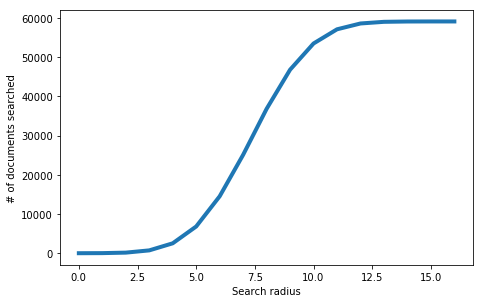

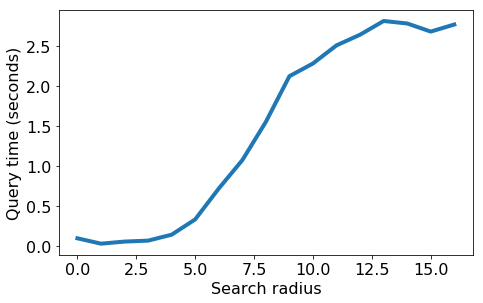

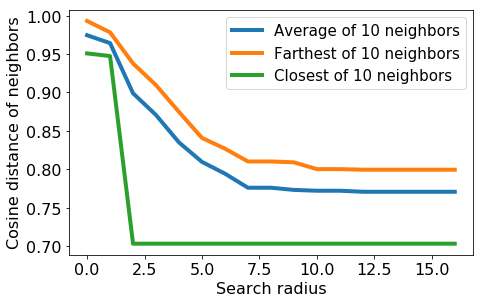

In [39]:
plt.figure(figsize=(7,4.5))
plt.plot(num_candidates_history, linewidth=4)
plt.xlabel('Search radius')
plt.ylabel('# of documents searched')
plt.rcParams.update({'font.size':16})
plt.tight_layout()

plt.figure(figsize=(7,4.5))
plt.plot(query_time_history, linewidth=4)
plt.xlabel('Search radius')
plt.ylabel('Query time (seconds)')
plt.rcParams.update({'font.size':16})
plt.tight_layout()

plt.figure(figsize=(7,4.5))
plt.plot(average_distance_from_query_history, linewidth=4, label='Average of 10 neighbors')
plt.plot(max_distance_from_query_history, linewidth=4, label='Farthest of 10 neighbors')
plt.plot(min_distance_from_query_history, linewidth=4, label='Closest of 10 neighbors')
plt.xlabel('Search radius')
plt.ylabel('Cosine distance of neighbors')
plt.legend(loc='best', prop={'size':15})
plt.rcParams.update({'font.size':16})
plt.tight_layout()

观察到的部分结果：

+ 随着搜索半径增加，找到更多的相似文章具有更小的距离。
+ 随着搜索半径增加，要检查的文章变多，相应的搜索时间更长。
+ 当搜索半径足够大时，LSH的搜索结果接近brute force搜索的结果。

**小问题：**如果希望得到的10篇近似最近邻文章，它们到query point的平均距离和真实的平均距离相差不差过0.01。比如，对Obama的真实数据时0.77，那么使搜索结果比0.78更好的最小搜索半径是多少？

In [40]:
for distance in average_distance_from_query_history:
    if abs(distance - 0.77) <= 0.01:
        print average_distance_from_query_history.index(distance), distance
        break

7 0.775982605852


### 近邻的准确性

为了测试是否普遍可靠，我们随机选10篇文章作为query point来分析。

对每篇文章，计算它真实的25最近邻，然后用LSH搜索，用两个标准来衡量：

+ 10篇中的准确率：LSH给出的10篇近邻中，有多少是在真正的25篇中的。
+ 到query的平均cosine distance

然后，用不同的搜索半径运行LSH多次。

In [41]:
def brute_force_query(vec, data, k):
    num_data_points = data.shape[0]
    
    # Compute distances for ALL data points in training set
    nearest_neighbors = graphlab.SFrame({'id':range(num_data_points)})
    nearest_neighbors['distance'] = pairwise_distances(data, vec, metric='cosine').flatten()
    
    return nearest_neighbors.topk('distance', k, reverse=True)

下面的代码块，对不同的搜索半径运行LSH，并测量两个标准(可能要运行一段时间)：

In [42]:
max_radius = 17
precision = {i:[] for i in xrange(max_radius)}
average_distance  = {i:[] for i in xrange(max_radius)}
query_time  = {i:[] for i in xrange(max_radius)}

np.random.seed(0)
num_queries = 10
for i, ix in enumerate(np.random.choice(corpus.shape[0], num_queries, replace=False)):
    print('%s / %s' % (i, num_queries))
    ground_truth = set(brute_force_query(corpus[ix,:], corpus, k=25)['id'])
    # Get the set of 25 true nearest neighbors
    
    for r in xrange(1,max_radius):
        start = time.time()
        result, num_candidates = query(corpus[ix,:], model, k=10, max_search_radius=r)
        end = time.time()

        query_time[r].append(end-start)
        # precision = (# of neighbors both in result and ground_truth)/10.0
        precision[r].append(len(set(result['id']) & ground_truth)/10.0)
        average_distance[r].append(result['distance'][1:].mean())

0 / 10
1 / 10
2 / 10
3 / 10
4 / 10
5 / 10
6 / 10
7 / 10
8 / 10
9 / 10


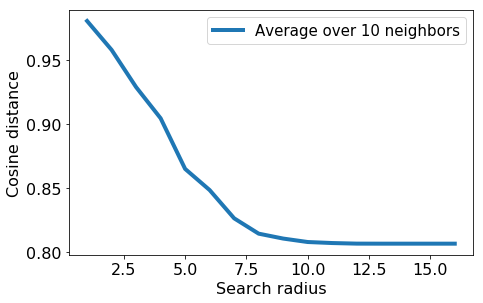

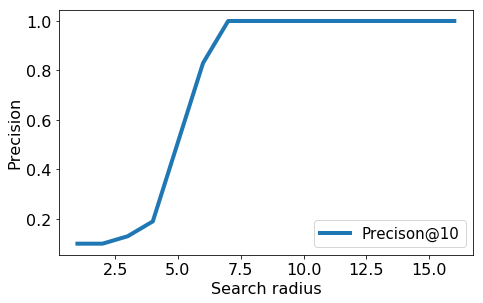

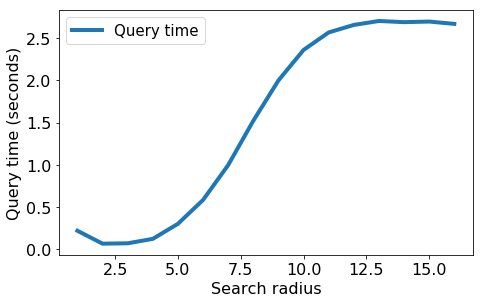

In [43]:
plt.figure(figsize=(7,4.5))
plt.plot(range(1,17), [np.mean(average_distance[i]) for i in xrange(1,17)], linewidth=4, label='Average over 10 neighbors')
plt.xlabel('Search radius')
plt.ylabel('Cosine distance')
plt.legend(loc='best', prop={'size':15})
plt.rcParams.update({'font.size':16})
plt.tight_layout()

plt.figure(figsize=(7,4.5))
plt.plot(range(1,17), [np.mean(precision[i]) for i in xrange(1,17)], linewidth=4, label='Precison@10')
plt.xlabel('Search radius')
plt.ylabel('Precision')
plt.legend(loc='best', prop={'size':15})
plt.rcParams.update({'font.size':16})
plt.tight_layout()

plt.figure(figsize=(7,4.5))
plt.plot(range(1,17), [np.mean(query_time[i]) for i in xrange(1,17)], linewidth=4, label='Query time')
plt.xlabel('Search radius')
plt.ylabel('Query time (seconds)')
plt.legend(loc='best', prop={'size':15})
plt.rcParams.update({'font.size':16})
plt.tight_layout()

发现Obama作为query point的观察结果可以推广到整个数据集上。

### <span id = "向量">随机向量的个数的影响</span>

接下来，我们看剩下的这个变量，随机向量的个数，对LSH效果的影响。固定搜索半径：3，对5-20个随机向量，运行LSH。要花一段时间。

In [44]:
precision = {i:[] for i in xrange(5,20)}
average_distance  = {i:[] for i in xrange(5,20)}
query_time = {i:[] for i in xrange(5,20)}
num_candidates_history = {i:[] for i in xrange(5,20)}
ground_truth = {}

np.random.seed(0)
num_queries = 10
docs = np.random.choice(corpus.shape[0], num_queries, replace=False)

for i, ix in enumerate(docs):
    ground_truth[ix] = set(brute_force_query(corpus[ix,:], corpus, k=25)['id'])
    # Get the set of 25 true nearest neighbors

for num_vector in xrange(5,20):
    print('num_vector = %s' % (num_vector))
    model = train_lsh(corpus, num_vector, seed=143)
    
    for i, ix in enumerate(docs):
        start = time.time()
        result, num_candidates = query(corpus[ix,:], model, k=10, max_search_radius=3)
        end = time.time()
        
        query_time[num_vector].append(end-start)
        precision[num_vector].append(len(set(result['id']) & ground_truth[ix])/10.0)
        average_distance[num_vector].append(result['distance'][1:].mean())
        num_candidates_history[num_vector].append(num_candidates)

num_vector = 5
num_vector = 6
num_vector = 7
num_vector = 8
num_vector = 9
num_vector = 10
num_vector = 11
num_vector = 12
num_vector = 13
num_vector = 14
num_vector = 15
num_vector = 16
num_vector = 17
num_vector = 18
num_vector = 19


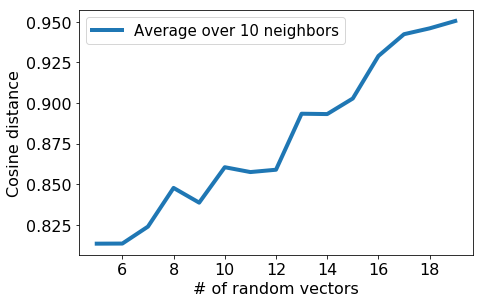

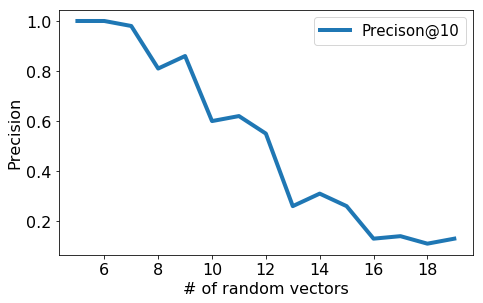

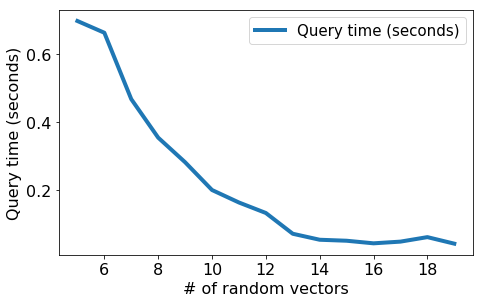

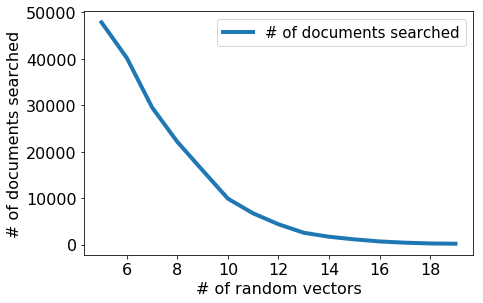

In [45]:
plt.figure(figsize=(7,4.5))
plt.plot(range(5,20), [np.mean(average_distance[i]) for i in xrange(5,20)], linewidth=4, label='Average over 10 neighbors')
plt.xlabel('# of random vectors')
plt.ylabel('Cosine distance')
plt.legend(loc='best', prop={'size':15})
plt.rcParams.update({'font.size':16})
plt.tight_layout()

plt.figure(figsize=(7,4.5))
plt.plot(range(5,20), [np.mean(precision[i]) for i in xrange(5,20)], linewidth=4, label='Precison@10')
plt.xlabel('# of random vectors')
plt.ylabel('Precision')
plt.legend(loc='best', prop={'size':15})
plt.rcParams.update({'font.size':16})
plt.tight_layout()

plt.figure(figsize=(7,4.5))
plt.plot(range(5,20), [np.mean(query_time[i]) for i in xrange(5,20)], linewidth=4, label='Query time (seconds)')
plt.xlabel('# of random vectors')
plt.ylabel('Query time (seconds)')
plt.legend(loc='best', prop={'size':15})
plt.rcParams.update({'font.size':16})
plt.tight_layout()

plt.figure(figsize=(7,4.5))
plt.plot(range(5,20), [np.mean(num_candidates_history[i]) for i in xrange(5,20)], linewidth=4,
         label='# of documents searched')
plt.xlabel('# of random vectors')
plt.ylabel('# of documents searched')
plt.legend(loc='best', prop={'size':15})
plt.rcParams.update({'font.size':16})
plt.tight_layout()

通过图表发现，随着随机向量数目的增加，搜索时间降低，因为每一个区域含有更少的数据点；但是近邻点的平均距离离query point更远。另一方面，当随机向量数目少的时候，结果更接近brute-force搜索：在一个区域中有很多店，所以对query point在的区域进行搜索得到很多点；这样包括邻近区域时，可能就是搜索几乎所有点，和brute-force搜索一样。